# MNIST

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [13]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "ec_tf_ft" in path:
            data["Mode"] += "_ec_tf_ft"
        elif "_ec_tf_epcoh2_tt" in path:
            data["Mode"] += "_ec_tf_epcoh2_tt"
        elif "BN00+G00" in path:
            data["Mode"] += "_BN00"
        elif "BN00+G01" in path:
            data["Mode"] += "_BN01"
        elif "fc" in path:
            continue

        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

# Digits

In [14]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-*-N100-*/s[1-9].csv"
    path_list = glob.glob(save_path)
    for path in path_list:
        if "CIFAR100-fedavg-G00-B0-D0-" in path:
            print(path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # data_temp['Mode'] = data_temp['Mode'] .map({'fedavg': "FedAvg", 
    #                                             'fedprox': "FedProx", 
    #                                             'scaffold': "Scaffold",  
    #                                             'feddyn': "FedDyn", 
    #                                             # 'G11': "FedGN",
    #                                            })
    # print(data_temp["Mode"].unique())
    # sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    # data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn']
    # data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    # print(data_temp.size)
    return data_temp

../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc01/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc01/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_ec_tf_epcoh2_tt/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_ec_tf_epcoh2_tt/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_ec_tf_ft1.0_EP0/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc10.0_EP0/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc10.0_EP200/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc10.0_EP200/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc

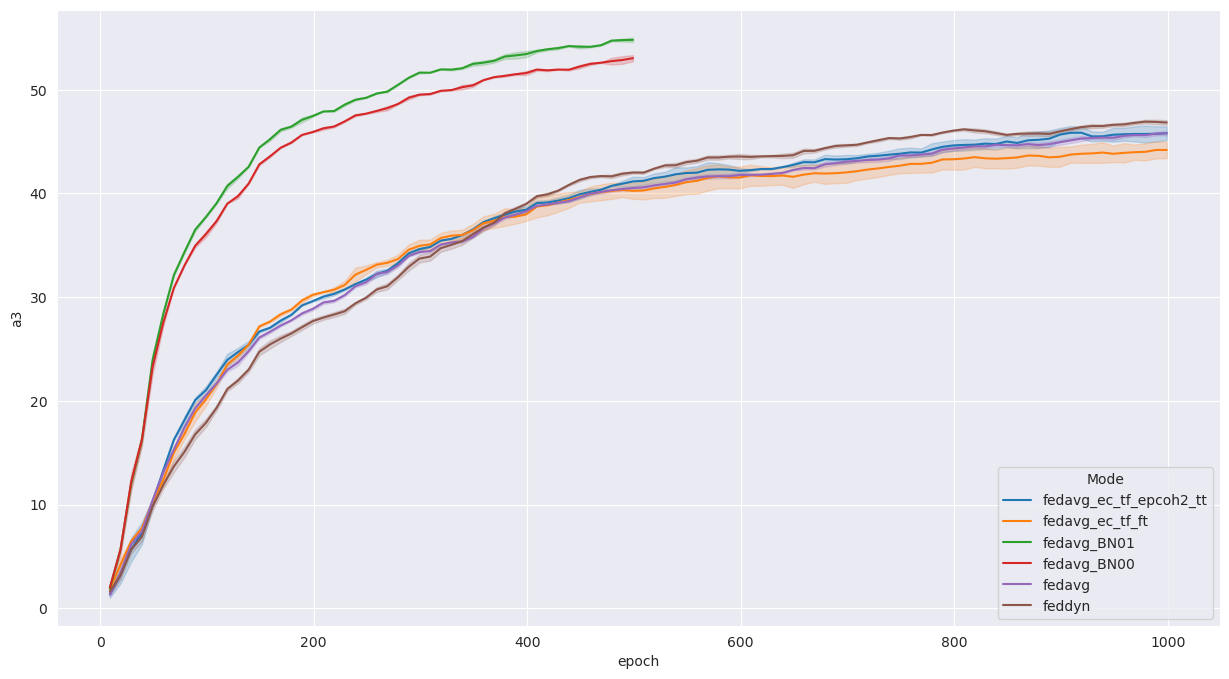

In [17]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,8), dpi=100, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    # ax = axes[i]
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[(temp["Mode"] != "scaffold") & (temp["Mode"] != "fedprox")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    
    print(temp.shape)
    ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", errorbar="se")

../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc01/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc01/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_ec_tf_epcoh2_tt/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_ec_tf_ft1.0_EP0/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc10.0_EP0/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc10.0_EP200/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc10.0_EP200/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_fc10.0/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01_ec_tf_ft/s1

KeyError: 'LR'

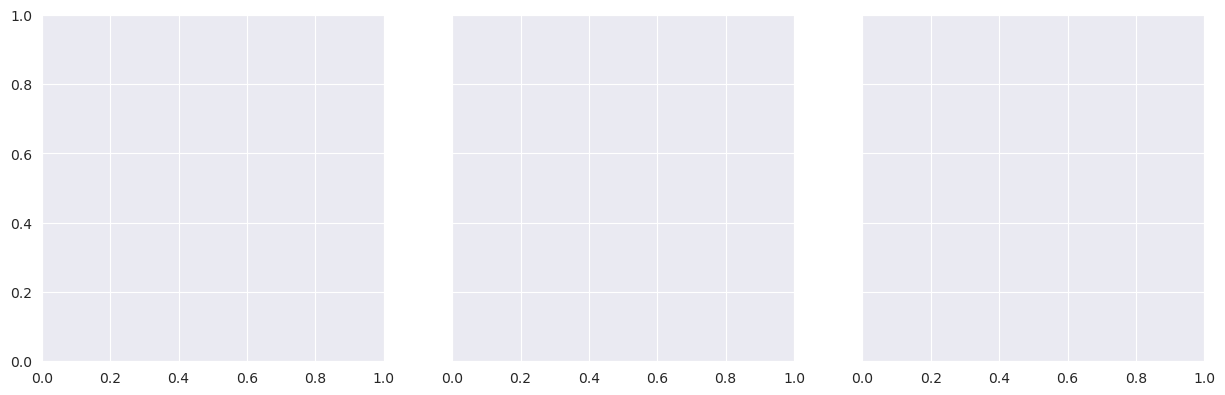

In [9]:
data_temp = load_data()

fig, axes = plt.subplots(1, 3, figsize=(15,4.5), dpi=100, sharey=True)
sns.set_style("darkgrid")
ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 1.0]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.2)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
# ax.set_ylim([75, 90])

ax = axes[1]

temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 1.0]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.8)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
# ax.set_ylim([75, 90])

ax = axes[2]

temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 1.0]
temp = temp[(temp["LR"] == 2.0)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
# ax.set_ylim([20, 55])

for ax in axes.flatten():
    ax.set_xlabel("Communication rounds")
    ax.set_ylabel("Test accuracy (%)"), 

# axes[0].legend('')
axes[1].legend(title="Distribution", loc=4, prop={'size': 9}), 
# axes[0].set_title("CIFAR-100, 100% participation")
# axes[1].set_title("CIFAR-100, 10% partial participation")
# axes[2].set_title("CIFAR-100, 1% partial participation")
fig.tight_layout()

../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P1.0/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01/s3.csv
['FedAvg' 'FedDyn' 'Scaffold' 'FedGN' 'FedProx']
247258
(173, 22)
(72, 22)
(450, 22)


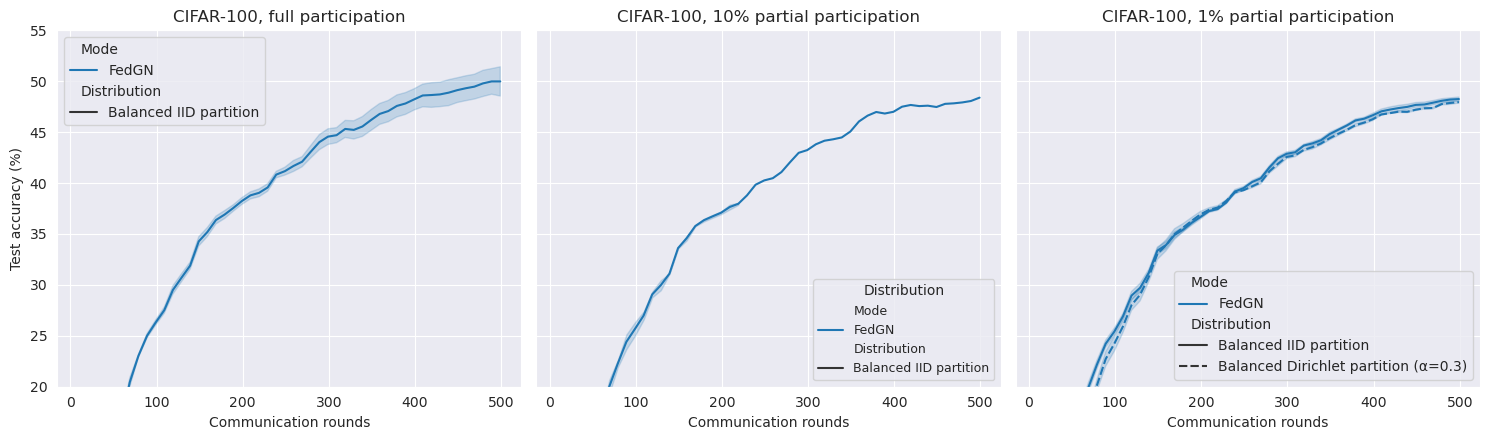

In [ ]:
data_temp = load_data()

fig, axes = plt.subplots(1, 3, figsize=(15,4.5), dpi=100, sharey=True)
sns.set_style("darkgrid")
ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 0.01]
temp = temp[temp["Mode"] == "FedGN"]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 2.0)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
# ax.set_ylim([75, 90])

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 0.01]
temp = temp[temp["Mode"] == "FedGN"]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.5)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
# ax.set_ylim([75, 90])

ax = axes[2]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 0.01]
temp = temp[temp["Mode"] == "FedGN"]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.2)]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
ax.set_ylim([20, 55])

for ax in axes.flatten():
    ax.set_xlabel("Communication rounds")
    ax.set_ylabel("Test accuracy (%)"), 

# axes[0].legend('')
axes[1].legend(title="Distribution", loc=4, prop={'size': 9}), 
axes[0].set_title("CIFAR-100, full participation")
axes[1].set_title("CIFAR-100, 10% partial participation")
axes[2].set_title("CIFAR-100, 1% partial participation")
fig.tight_layout()